In [1]:
# Ucitavanje biblioteka
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data frame - iz pandas-a
imena = ["Pol", "Dužina", "Prečnik", "Visina", "Ukupna težina", "Težina mesa", "Težina utrobe", "Težina ljuske", "Broj prstena"]
podaci_df=pd.read_csv('abalone.csv', names = imena) #ucitavanje podataka
podaci_df.head() #prikaz prvih 5 redova

,Pol,Dužina,Prečnik,Visina,Ukupna težina,Težina mesa,Težina utrobe,Težina ljuske,Broj prstena
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# Kodiranje pola
podaci_df['Pol'] = podaci_df['Pol'].replace({'M': 1.0, 'F': 0.5, 'I': 0.0}) #normalizovane vrednosti
podaci_df.head()

,Pol,Dužina,Prečnik,Visina,Ukupna težina,Težina mesa,Težina utrobe,Težina ljuske,Broj prstena
0,1.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.5,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# Opis podataka
podaci_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Pol              4177 non-null float64
Dužina           4177 non-null float64
Prečnik          4177 non-null float64
Visina           4177 non-null float64
Ukupna težina    4177 non-null float64
Težina mesa      4177 non-null float64
Težina utrobe    4177 non-null float64
Težina ljuske    4177 non-null float64
Broj prstena     4177 non-null int64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [4]:
# Opis podataka - nastavak
podaci_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pol,4177.0,0.522265,0.413907,0.0000,0.0000,0.5000,1.000,1.0000
Dužina,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Prečnik,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Visina,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Ukupna težina,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Težina mesa,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Težina utrobe,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Težina ljuske,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Broj prstena,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [5]:
# Izbacivanje abalonea sa visinom = 0
print("Broj abalonea pre izbacivanja =", podaci_df.shape[0])
podaci_df = podaci_df.drop(podaci_df[podaci_df['Visina'] == 0].index).reset_index(drop=True)
print("Broj abalonea nakon izbacivanja =", podaci_df.shape[0])

Broj abalonea pre izbacivanja = 4177
Broj abalonea nakon izbacivanja = 4175


In [6]:
# Izbacivanje abalonea sa greskom u evidenciji tezine.
# Ukupna tezina mora biti veca od pojedinacnih (desava se gubitak tecnosti pri otvaranju i ciscenju)
upit = podaci_df['Ukupna težina'] < podaci_df['Težina mesa'] + podaci_df['Težina utrobe'] + podaci_df['Težina ljuske']
podaci_df = podaci_df.drop(podaci_df[upit].index).reset_index(drop=True)
print("Broj abalonea nakon novog izbacivanja =", podaci_df.shape[0])

Broj abalonea nakon novog izbacivanja = 4021


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000040C0BC8>,
      dtype=object)

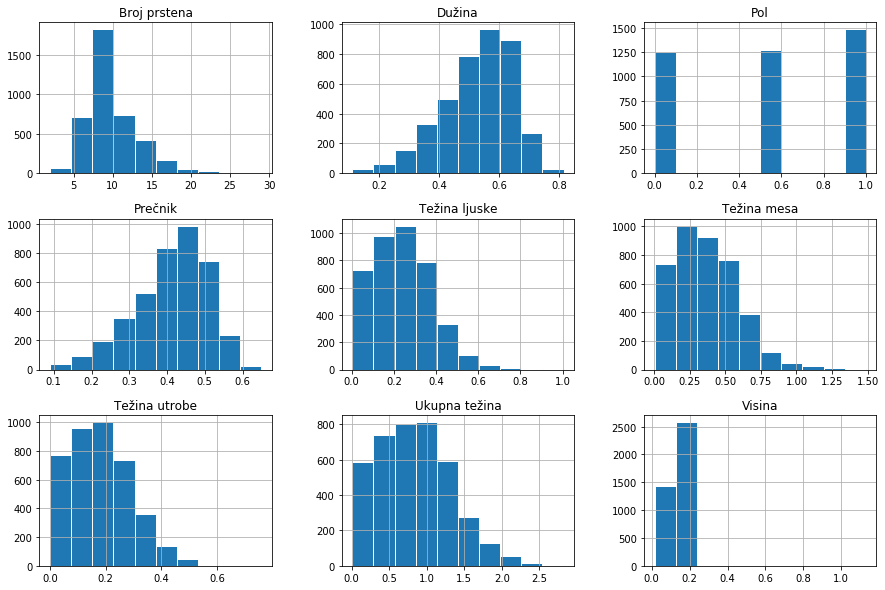

In [7]:
# Histogrami za sve atribute
podaci_df.hist(figsize=(15, 10), edgecolor='white')

In [8]:
podaci_df['Broj prstena'].describe()

count    4021.000000
mean       10.003482
std         3.221892
min         2.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        29.000000
Name: Broj prstena, dtype: float64

In [9]:
# Provera broja klasa - broj prstena
broj_klasa = podaci_df['Broj prstena'].nunique()
print("Broj klasa (broj jedinstvenih prstena) =", broj_klasa)

Broj klasa (broj jedinstvenih prstena) = 27


In [10]:
# Broj abalonea po broju prstena
broj_prstena = podaci_df['Broj prstena'].value_counts().sort_index()
print("Broj abalonea po broju prstena:\n")
print(broj_prstena)

Broj abalonea po broju prstena:

2       1
3      12
4      50
5     102
6     240
7     369
8     543
9     662
10    620
11    478
12    260
13    199
14    126
15    100
16     66
17     58
18     42
19     31
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Broj prstena, dtype: int64


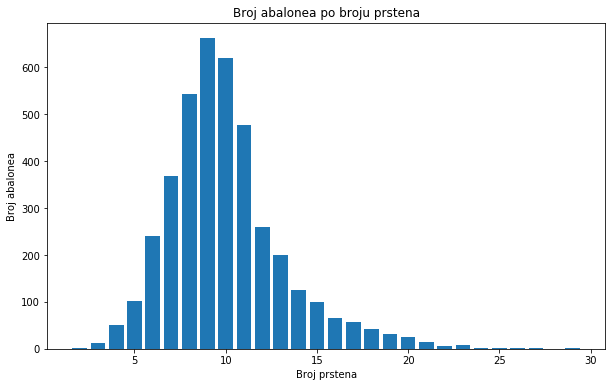

In [11]:
# Graficka predstava broja abalonea po broju prstena
plt.figure(figsize=(10, 6))
plt.bar(broj_prstena.index, broj_prstena.values)
plt.xlabel('Broj prstena')
plt.ylabel('Broj abalonea')
plt.title('Broj abalonea po broju prstena')
plt.show()

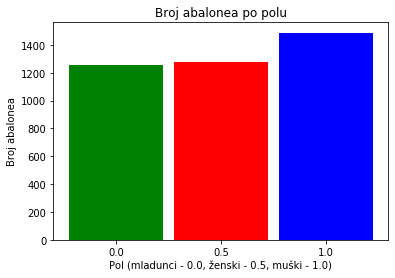

In [12]:
# Broj abalonea po polu
clanovi_po_polu = podaci_df['Pol'].value_counts()
boje = ['blue', 'red', 'green']

# Grafik
plt.bar(clanovi_po_polu.index, clanovi_po_polu.values, width = 0.45, color=boje)
plt.xlabel('Pol (mladunci - 0.0, ženski - 0.5, muški - 1.0)')
plt.ylabel('Broj abalonea')
plt.title('Broj abalonea po polu')

# Podeoci na x osi
plt.xticks((0.0, 0.5, 1.0))
plt.show()

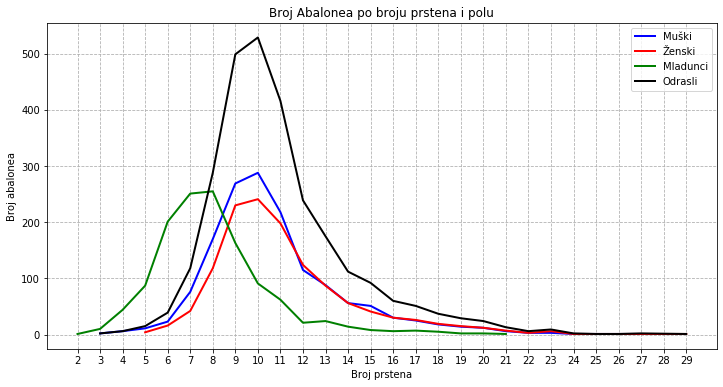

In [13]:
# Podaci po polu
m_podaci_df = podaci_df[podaci_df['Pol'] == 1.0]
z_podaci_df = podaci_df[podaci_df['Pol'] == 0.5]
ml_podaci_df = podaci_df[podaci_df['Pol'] == 0.0]

# Podaci za odrasle
o_podaci_df = podaci_df[podaci_df['Pol'] > 0.0]

# Broj prstena po polu
m_prsteni = m_podaci_df['Broj prstena'].value_counts().sort_index()
z_prsteni = z_podaci_df['Broj prstena'].value_counts().sort_index()
ml_prsteni = ml_podaci_df['Broj prstena'].value_counts().sort_index()
o_prsteni = o_podaci_df['Broj prstena'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Grafici
plt.plot(m_prsteni.index, m_prsteni.values, color='blue', linewidth=2, label='Muški')
plt.plot(z_prsteni.index, z_prsteni.values, color='red', linewidth=2, label='Ženski')
plt.plot(ml_prsteni.index, ml_prsteni.values, color='green', linewidth=2, label='Mladunci')
plt.plot(o_prsteni.index, o_prsteni.values, color='black', linewidth=2, label='Odrasli')

plt.xlabel('Broj prstena')
plt.ylabel('Broj abalonea')
plt.title('Broj Abalonea po broju prstena i polu')

plt.legend()
plt.grid(True, linestyle='--')

# Podeoci na x osi
plt.xticks(range(min(podaci_df['Broj prstena']), max(podaci_df['Broj prstena'])+1))

plt.show()

In [14]:
# Podela na starosne kategorije - smanjenje klasifikacije
uslovi = [
    podaci_df['Broj prstena'] <= 8, #mladi
    (podaci_df['Broj prstena'] > 8) & (podaci_df['Broj prstena'] <= 16), #zreli
    podaci_df['Broj prstena'] > 16 #stari
]
vrednosti = [0, 1, 2] #mladi, zreli, stari

# Dodavanje nove kolone - starost
podaci_df['Starost'] = pd.Series(pd.Categorical(np.select(uslovi, vrednosti), ordered=True))

podaci_df.head(1)

,Pol,Dužina,Prečnik,Visina,Ukupna težina,Težina mesa,Težina utrobe,Težina ljuske,Broj prstena,Starost
0,1.0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15,1


In [15]:
# Izbacivanje prstena
podaci_df = podaci_df.drop(['Broj prstena'], axis=1)
podaci_df.head(1)

,Pol,Dužina,Prečnik,Visina,Ukupna težina,Težina mesa,Težina utrobe,Težina ljuske,Starost
0,1.0,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,1


In [16]:
from sklearn.model_selection import train_test_split

# Podela podataka na nezavisne i zavisne podatke
X = podaci_df.drop('Starost', axis=1)
y = podaci_df['Starost']

# Podela podataka na trening i test skup
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
#Trening skup - pronalazak najboljih parametara
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

parametri = {'solver': ['lbfgs', ], 'max_iter': [500, 1000, 1500], 'alpha': 10.0 ** -np.arange(1, 10),
             'hidden_layer_sizes':np.arange(4, 6), 'random_state':[10]}

mplc = GridSearchCV(MLPClassifier(), parametri, n_jobs=-1)
mplc = mplc.fit(X_train, y_train)
print("Tacnost na trening skupu: ", mplc.score(X_train, y_train))
print("Najbolji parametri:\n", mplc.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Tacnost na trening skupu:  0.7944651741293532
Najbolji parametri:
 {'alpha': 0.1, 'hidden_layer_sizes': 5, 'max_iter': 500, 'random_state': 10, 'solver': 'lbfgs'}


In [18]:
#Test skup - odredjivanje tacnosti
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_test_pred = mplc.predict(X_test)
test_tacnost = accuracy_score(y_test, y_test_pred)

print('Tacnost: ', test_tacnost)

Tacnost:  0.8049689440993789


In [19]:
# Konfuziona matrica
konfuziona_matrica = confusion_matrix(y_test, y_test_pred)
print(konfuziona_matrica)

[[203  89   0]
 [ 28 436   4]
 [  0  36   9]]


In [20]:
# Izvestaj o klasifikaciji
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       292
           1       0.78      0.93      0.85       468
           2       0.69      0.20      0.31        45

    accuracy                           0.80       805
   macro avg       0.78      0.61      0.64       805
weighted avg       0.81      0.80      0.79       805

